In [ ]:
# Detail the steps involved in sentimental analysis. 
# Give related python or R packages. Bonus points for explaining with code and sample data - Twitter Data

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("E:/Data Science/Interviews/Brillio/Dataset")

# Reading the data and understanding the problem Statement 

In [3]:
# Reading the train Data #

df = pd.read_csv("train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Size of the data #

df.shape

# 31,962 - records and 2 independent features and 1 target variable

(31962, 3)

In [5]:
# Reading the train Data #

df1 = pd.read_csv("test.csv")
df1.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
# Size of the data #

df1.shape

# 17,197- records and 2 independent features 

(17197, 2)

In [7]:
# Types of sentiments : total classes available for target variable (labels) : 2 classes

df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
# Understanding the sentiments in the data #

df[df['label']==0].head(20) 

# Class 0 : shows the list of positive sentiments


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
# Understanding the sentiments in the data #

df[df['label']==1].head(20) 

# Class 1  : Negative sentiments of the user 

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


# Problem Statement : Classify the tweets into positive or a negative sentiments ( Sentiment analysis)

In [10]:
# Check the missing values # - Train

df.isnull().sum()

# No missing values 

id       0
label    0
tweet    0
dtype: int64

In [11]:
# We can drop the ID column as it does not have any importance in builiding the model #

df.drop(['id'],axis=1,inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# EDA - Understanding the twitter sentiment data #

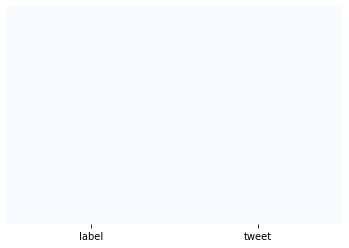

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

# There no missing values #

In [14]:
!pip install WordCloud

# Visualize the most frequent words #

In [15]:
#  word cloud library #
from wordcloud import WordCloud

In [16]:
# Combining all tje records togather into a list #

sentences = df['tweet'].tolist()
len(sentences)

31962

In [18]:
#Joining sentences (combining all the sentences togather into one paragraph through string separation)
sentences_as_single_string = " ".join(sentences)

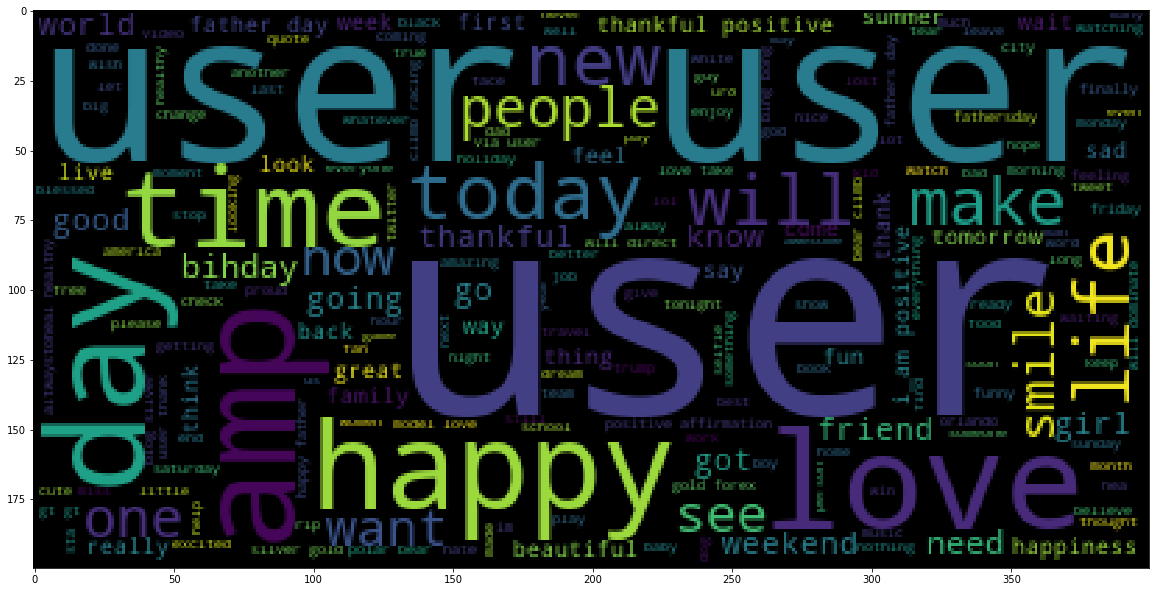

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_string))

# From this plort, we can understand that positive words are more as compared to the negative words, as we already know that the data is 
# data is imbalanced that we habe more records of positive sentiments (29720) against the negative sentiments (2242)

# Size of words shows the frequency of this word in this document #

In [57]:
# Analyzing the positive words from this positive sentiments # 

positive = df[df['label']==0]['tweet']
positive

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31956    off fishing tomorrow @user carnt wait first ti...
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31961                     thank you @user for you follow  
Name: tweet, Length: 29720, dtype: object

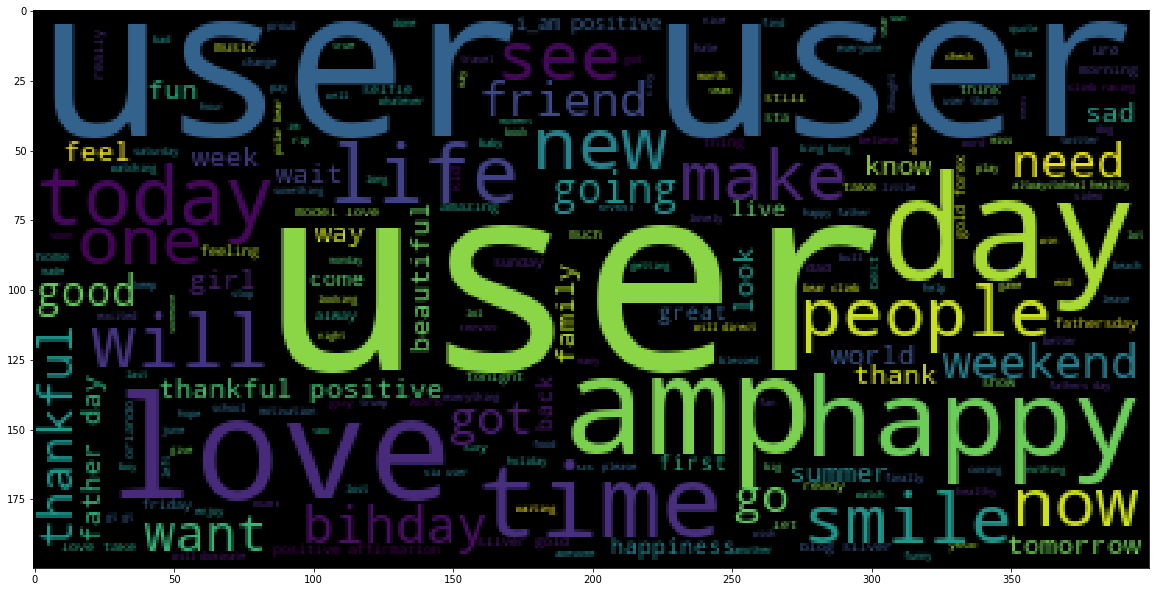

In [58]:
# Understanding positive words from positive sentiments #

pos = positive.tolist()
sentences_as_single_positive = " ".join(pos)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_positive))

# Postive Words # 

Smile, good, great, beautiful, happy, love, etc.

In [60]:
# Analyzing the negative words from this negative sentiments # 

negative = df[df['label']==1]['tweet']
negative

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

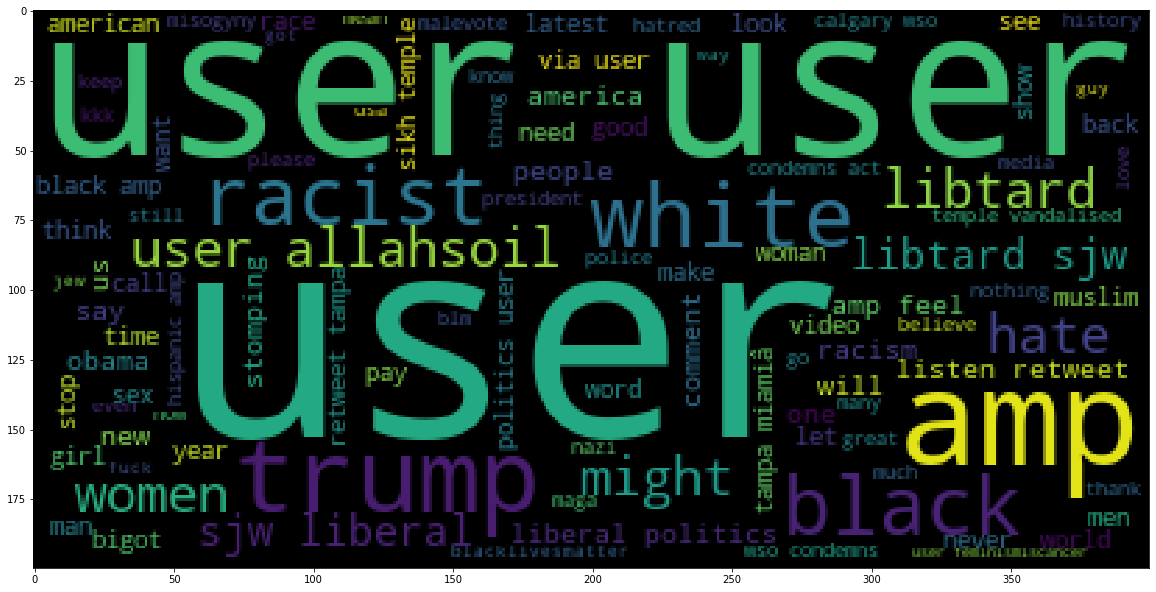

In [61]:
# Understanding negative words from negative sentiments #

neg = negative.tolist()
sentences_as_single_negative = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_negative))

# Negative Words - Hate Speech # 

bigot, racist,hate, black, condemn, etc.

# Data Preprocessing Steps #

In [20]:
# Data Cleaning : Removing the exclaimation, fullstops, commas, hashtags, symbols, hyphen, semicolon, etc. from this tweets

# String.punctuation : All punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Removing Punctuation

In [21]:
def clean(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)
    
    return remv_punc_join

In [28]:
clean(' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run')


' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run'

In [31]:
tweets_df_clean = df['tweet'].apply(clean)

In [23]:
tweets_df_clean[6]

# Hence we are able to clean the text data correctly

' user camping tomorrow user user user user user user user dannyâ\x80¦'

In [32]:
tweets_df_clean

0         user when a father is dysfunctional and is so...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate user isz that youuuðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                      thank you user for you follow  
Name: tweet, Length: 31962, dtype: object

In [101]:
!pip install nltk

# Removing stopwords

In [29]:
# Removal of StopWords fromt this text #

import nltk
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])
# Belw is the list of StopWords in english language 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [35]:
tweets_df = pd.DataFrame(tweets_df_clean)
tweets_df.columns

Index(['tweet'], dtype='object')

In [33]:
# stopwords treatment and converting the data into lpwer case #
def stop(text):
    remv_stop = [a for a in text.split() if a.lower() not in stopwords]
    remv_stop_join = ' '.join(remv_stop)
    return remv_stop_join

In [36]:
tweets_df['tweet'][0]

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run'

In [37]:
stop(tweets_df['tweet'][0])

'user father dysfunctional selfish drags kids dysfunction run'

In [38]:
tweets_df_stopwords = tweets_df['tweet'].apply(stop)

In [39]:
tweets_df_stopwords[:2]

# all stopwords have been removed from this document#

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
Name: tweet, dtype: object

In [40]:
tweets_df_stopwords = pd.DataFrame(tweets_df_stopwords)
tweets_df_stopwords

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð± ðððð...
4,factsguide society motivation
...,...
31957,ate user isz youuuððððððð...
31958,see nina turner airwaves trying wrap mantle ge...
31959,listening sad songs monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


# Applying Stemming 

In [41]:
# Applying the Stemming to reduce the word to its root form #

#Porter Stemmer : It is used to stem all the words ( inclduing the stopwords as well) so we have removed the stopwords as well
from nltk.stem import PorterStemmer
st = PorterStemmer()

def steming(text):
    ste = [st.stem(word) for word in text.split()]
    ste_join = ' '.join(ste)
    return ste_join

In [42]:
tweets_df_stem = tweets_df_stopwords['tweet'].apply(steming)

tweets_df_stem[:2]

# The dataset has been stemmed to its root word

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit cant use caus dont...
Name: tweet, dtype: object

In [47]:
tweets_df_stem['tweet'][0]

'user father dysfunct selfish drag kid dysfunct run'

In [44]:
tweets_df_stopwords['tweet'][0]

'user father dysfunctional selfish drags kids dysfunction run'

# Applying Lemmatization

In [74]:

from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()


In [79]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [80]:

def lematize(text):
    ste = [wl.lemmatize(word) for word in text.split()]
    ste_join = ' '.join(ste)
    return ste_join

In [81]:
lematize('user father dysfunctional selfish drags kids dysfunction run')

'user father dysfunctional selfish drag kid dysfunction run'

In [43]:
tweets_df_stopwords.iloc[:2]

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...


In [46]:
tweets_df_stem = pd.DataFrame(tweets_df_stem)
tweets_df_stem.head()

,tweet
0,user father dysfunct selfish drag kid dysfunct...
1,user user thank lyft credit cant use caus dont...
2,bihday majesti
3,model love u take u time urð± ðððð...
4,factsguid societi motiv


# Advanced preprocessing techniques : CountVectorizer , TfidfVectorizer

In [48]:
# Applying the Count Vectorizer 

from sklearn.feature_extraction.text import CountVectorizer 

cv = CountVectorizer(max_features=5000)

sen = tweets_df_stem['tweet'].tolist()
len(sen)



31962

In [49]:
from pandas import DataFrame

In [50]:
def document_matrix(text, vectorizer):
    mat = vectorizer.fit_transform(text)
    return DataFrame(mat.toarray())

In [51]:
m = document_matrix(sen,cv)
m.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Tfidf Vectorizer #

from sklearn.feature_extraction.text import TfidfVectorizer 


tfidf_vec = TfidfVectorizer(max_features=2500)

In [53]:
n = document_matrix(sen,tfidf_vec)
n.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
n.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting the data into dependent and independent variables

In [55]:
# splitting the data #

# Independent and dependent vcariables #

y= df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [56]:
# splitting the data #

# 1st Model : We will use the Count Vectorizer document


# Splitting the data into test and train #

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(m,y,test_size=0.33,random_state=25)

In [57]:
x_train.shape

(21414, 5000)

In [58]:
y_train.shape

(21414,)

In [ ]:
Optmization of the Model, through different hyper parameter tuning 
# Model 1 : Using the Count Vectorizer and stemming technique
# Model 2 : Using the TFIDF Vectorizer and stemming technique

# Model 1 :  Using the Count Vectorizer and stemming technique

In [59]:
# Model Building #
# Applying the Naive Bayes Algorithm #

from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
# Predicting train cases
y_pred_train = NaiveBclassifier.predict(x_train)

In [67]:
#Accuract Score #

acc = accuracy_score(y_train, y_pred_train)
acc

0.9614738021854862

In [60]:
# Predicting test cases
y_pred_test = NaiveBclassifier.predict(x_test)

In [64]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[9474,  332],
       [ 232,  510]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred_test)
acc

0.9465301478953356

# Model 2 : Using the TFIDF Vectorizer and stemming technique

In [68]:
# splitting the data #

# 2nd Model : We will use the TFIDF Vectorizer document

# Splitting the data into test and train #

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(n,y,test_size=0.33,random_state=25)

In [69]:
# Model Building #
# 2nd Model : We will use the TFIDF Vectorizer document

# Applying the Naive Bayes Algorithm #

from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
# Predicting train cases
y_pred_train = NaiveBclassifier.predict(x_train)

In [71]:
#Accuract Score #

acc = accuracy_score(y_train, y_pred_train)
acc

0.9537685626225834

In [72]:
# Predicting test cases
y_pred_test = NaiveBclassifier.predict(x_test)

In [73]:
acc = accuracy_score(y_test, y_pred_test)
acc

0.9492794842624194

# Model can give an accuracy of 94.92% on any randomly selected data 